In [18]:
# First, let's import the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("SPAM text message 20170820 - Data.csv") 


In [2]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2)



In [4]:
train_data

,Category,Message
3647,ham,Carlos says we can pick up from him later so y...
1027,ham,Yes da. Any plm at ur office
577,ham,I'm tired of arguing with you about this week ...
5484,ham,", , and picking them up from various points ..."
2283,ham,Whom you waited for yesterday
...,...,...
1384,ham,Please reserve ticket on saturday eve from che...
238,ham,Where are you?when wil you reach here?
4196,spam,Double mins and txts 4 6months FREE Bluetooth ...
4754,spam,Cashbin.co.uk (Get lots of cash this weekend!)...


In [5]:
test_data

,Category,Message
3762,ham,Was just about to ask. Will keep this one. May...
412,ham,Cos i want it to be your thing
1147,ham,Babe ? I lost you ... :-(
965,ham,Are you this much buzy
4322,ham,"K, jason says he's gonna be around so I'll be ..."
...,...,...
2534,ham,Glad it went well :) come over at 11 then we'l...
2792,ham,"… we r stayin here an extra week, back next we..."
2476,ham,Mm i am on the way to railway
768,ham,"Sorry, I'll call later"


In [7]:
# Convert texts into numbers using CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
train_features = vectorizer.fit_transform(train_data['Message']) 
test_features = vectorizer.transform(test_data['Message'])



In [8]:
vectorizer

CountVectorizer(stop_words='english')

In [22]:
train_features

<4457x7505 sparse matrix of type '<class 'numpy.int64'>'
	with 34414 stored elements in Compressed Sparse Row format>

In [10]:
test_features

<1115x7505 sparse matrix of type '<class 'numpy.int64'>'
	with 8105 stored elements in Compressed Sparse Row format>

In [12]:
# Now, let's classify using Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_data['Category']) 
nb_predictions = nb_classifier.predict(test_features)
print("Naive Bayes Accuracy:", accuracy_score(test_data['Category'], nb_predictions))




Naive Bayes Accuracy: 0.989237668161435


In [13]:
# Next, classify using SVM
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(train_features, train_data['Category'])
svm_predictions = svm_classifier.predict(test_features)
print("SVM Accuracy:", accuracy_score(test_data['Category'], svm_predictions))

SVM Accuracy: 0.9901345291479821


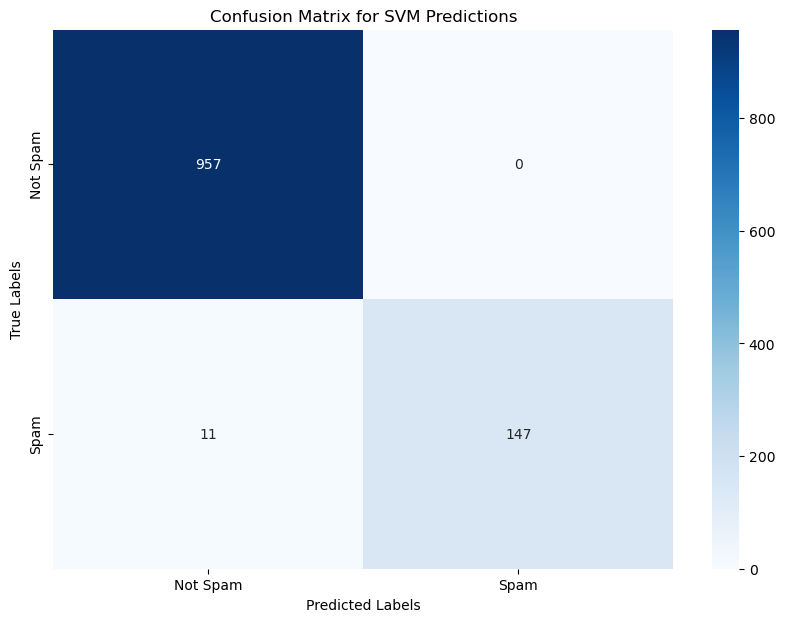

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(test_data['Category'], svm_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
            
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Predictions')
plt.show()


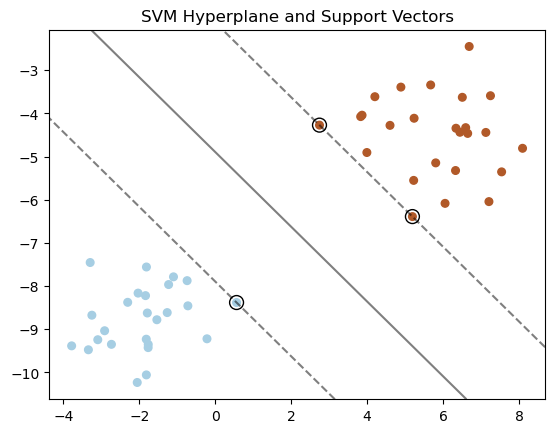

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a 2D dataset
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

# Train the SVM
clf = SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot the support vectors (important data points that define the hyperplane)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM Hyperplane and Support Vectors")
plt.show()
